In [8]:
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.circuit.library import GroverOperator

In [9]:
# Создаем оракул для функции поиска
oracle = QuantumCircuit(2)
oracle.cz(0, 1)  # Помечаем элемент, который хотим найти

# Создаем схему Гровера
grover = GroverOperator(oracle)
qc = QuantumCircuit(2, 2)
qc.h([0, 1])  # Создаем суперпозицию
qc.append(grover, [0, 1])  # Применяем оператор Гровера
qc.measure([0, 1], [0, 1])  # Измеряем

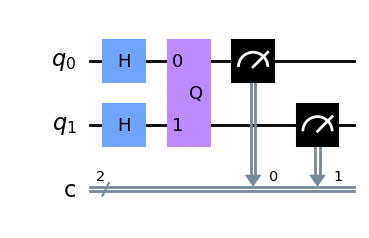

In [10]:
# Визуализируем квантовую схему
qc.draw("mpl")  # Отображаем схему в формате matplotlib

Результаты алгоритма Гровера: {'11': 1024}


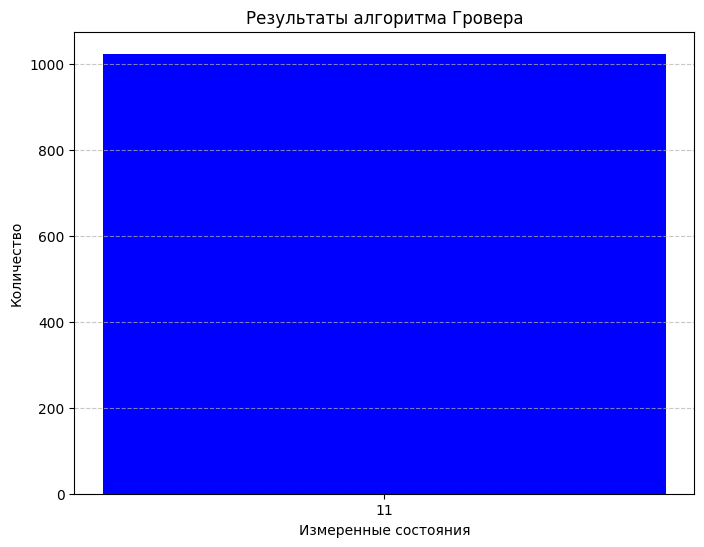

In [11]:
# Определяем симулятор
simulator = Aer.get_backend('qasm_simulator')

# Выполняем на симуляторе
job = execute(qc, simulator, shots=1024)
result = job.result()

# Получаем результаты измерений
counts = result.get_counts(qc)
labels = list(counts.keys())
values = list(counts.values())
print("Результаты алгоритма Гровера:", counts)

# Визуализируем результаты
plt.figure(figsize=(8, 6))  # Устанавливаем размер графика
plt.bar(labels, values, color=['blue', 'orange'])
plot_histogram(counts)  # Создаем гистограмму на основе полученных результатов
plt.title('Результаты алгоритма Гровера')  # Заголовок графика
plt.xlabel('Измеренные состояния')  # Подпись оси X
plt.ylabel('Количество')  # Подпись оси Y
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавляем сетку по оси Y
plt.show()  # Отображаем график